In [1]:
import os
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
train = pd.read_csv('./train_LbELtWX/train70000.csv')

In [3]:
print(train)

          id  label  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0          1      9         NaN         NaN         1.0         9.0
1          2      0         NaN         NaN         2.0         0.0
2          3      0         NaN         NaN         3.0         0.0
3          4      3         NaN         NaN         4.0         3.0
4          5      0         NaN         NaN         5.0         0.0
5          6      2         NaN         NaN         6.0         2.0
6          7      7         NaN         NaN         7.0         7.0
7          8      2         NaN         NaN         8.0         2.0
8          9      5         NaN         NaN         9.0         5.0
9         10      5         NaN         NaN        10.0         5.0
10        11      0         NaN         NaN        11.0         0.0
11        12      9         NaN         NaN        12.0         9.0
12        13      5         NaN         NaN        13.0         5.0
13        14      5         NaN         NaN     

In [4]:
import matplotlib.pyplot as plt

In [5]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('./train_LbELtWX/train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/70000 [00:00<?, ?it/s]/Applications/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 70000/70000 [01:15<00:00, 925.22it/s] 


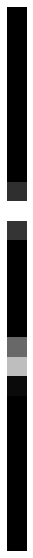

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.axis('off')
plt.imshow(train_image[2][0],cmap='gray')
plt.show()

In [7]:
y=train['label'].values
y = to_categorical(y) # convert it to 2 categories (0 or 1). So 2 columns
print(y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1))) # changed this
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # changed from 10

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
# Train the file
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# about 15-20 min to process all

Train on 56000 samples, validate on 14000 samples
Epoch 1/10
56000/56000 [==============================] - 130s 2ms/sample - loss: 0.5834 - accuracy: 0.7915 - val_loss: 0.3454 - val_accuracy: 0.8759
Epoch 2/10
56000/56000 [==============================] - 133s 2ms/sample - loss: 0.3878 - accuracy: 0.8607 - val_loss: 0.3113 - val_accuracy: 0.8869
Epoch 3/10
56000/56000 [==============================] - 129s 2ms/sample - loss: 0.3363 - accuracy: 0.8779 - val_loss: 0.2735 - val_accuracy: 0.9007
Epoch 4/10
56000/56000 [==============================] - 131s 2ms/sample - loss: 0.2991 - accuracy: 0.8902 - val_loss: 0.2716 - val_accuracy: 0.9021
Epoch 5/10
56000/56000 [==============================] - 130s 2ms/sample - loss: 0.2725 - accuracy: 0.8972 - val_loss: 0.2571 - val_accuracy: 0.9060
Epoch 6/10
56000/56000 [==============================] - 129s 2ms/sample - loss: 0.2466 - accuracy: 0.9088 - val_loss: 0.2557 - val_accuracy: 0.9068
Epoch 7/10
56000/56000 [==========================